In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [98]:
def load_generation_data(exclude_files=None):
    # data/generation 디렉토리 경로
    data_dir = '/Users/jangseohyun/Documents/workspace/symply/DER/data/generation'
    
    # 디렉토리 내의 모든 CSV 파일 목록 가져오기
    all_files = sorted([f for f in os.listdir(data_dir) if f.endswith('.csv')])
    
    # 제외할 파일 처리
    if exclude_files is not None:
        files_to_load = [f for f in all_files if f not in exclude_files]
    else:
        files_to_load = all_files
    
    # 선택된 파일들 불러오기
    data_frames = {}
    loaded_files = []
    for file in files_to_load:
        file_path = os.path.join(data_dir, file)
        df = pd.read_csv(file_path)
        data_frames[file] = df
        loaded_files.append(file)
    print(f"총 {len(loaded_files)}개를 불러왔습니다 ({', '.join(loaded_files)})")
    
    return data_frames

In [99]:
def plot_daily_generation(data_frames, selected_dates=None):
    # 첫 번째 데이터를 기준으로 날짜 목록 가져오기
    first_df = list(data_frames.values())[0]
    dates_array = np.array(first_df['Date'].unique())
    
    # selected_dates 처리
    if selected_dates is None:
        # None이면 모든 날짜 사용
        dates_to_plot = dates_array
    elif isinstance(selected_dates, (int, np.integer)):
        # 숫자 하나만 입력한 경우
        dates_to_plot = [dates_array[selected_dates]]
    elif isinstance(selected_dates, list):
        # 날짜 리스트를 입력한 경우
        dates_to_plot = [dates_array[i] for i in selected_dates]
    else:
        raise ValueError("selected_dates must be None, int, or list of ints")
    
    # 각 선택된 날짜별로 플랏
    for date in dates_to_plot:
        plt.figure(figsize=(12, 6))
        
        # 각 발전기(CSV 파일)별로 플랏
        for file_name, df in data_frames.items():
            # 해당 날짜의 데이터만 선택
            mask = df['Date'] == date
            daily_hours = df[mask]['Hour (Eastern Time, Daylight-Adjusted)'].to_numpy()
            daily_generation = df[mask]['Electricity Generated'].to_numpy()
            
            # 발전량 플랏
            label = f'DER {file_name.split(".")[0]}'
            plt.plot(daily_hours, daily_generation, label=label, marker='o')
        
        plt.title(f'Daily Generation - {date}')
        plt.xlabel('Hour')
        plt.ylabel('Electricity Generated (kW)')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(False)
        plt.xticks(range(0, 24))
        plt.yticks([])
        plt.tight_layout()
        plt.show()


총 14개를 불러왔습니다 (1341.csv, 228.csv, 236.csv, 248.csv, 261.csv, 281.csv, 401.csv, 430.csv, 524.csv, 525.csv, 673.csv, 692.csv, 775.csv, 89.csv)


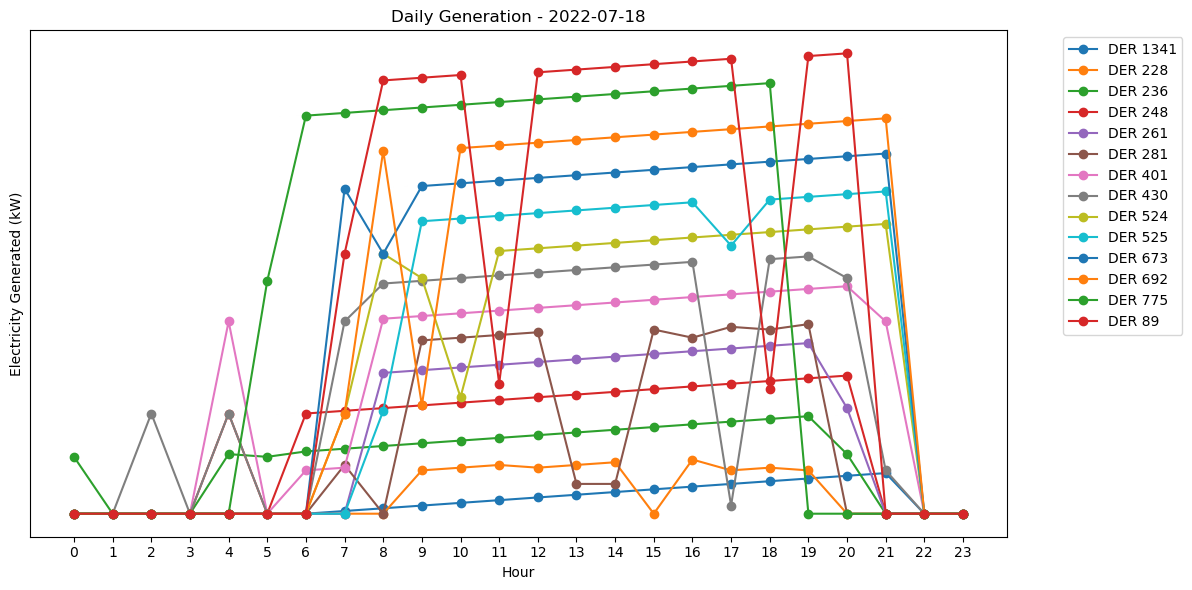

In [100]:
exclude_files = ['106.csv', '137.csv', '745.csv', '765.csv', '689.csv', '1113.csv']
data = load_generation_data(exclude_files)
plot_daily_generation(data, 18)
# plot_daily_generation(data, [5, 17, 18, 24, 25, 29])
# 합격: 89, 430, 401, 281, 228
# 애매: 689, 248, 1113, 1341
# 불합: 106, 137, 745, 765
